<a id='start'></a>
# Data Analysis System for the High School Final Exams in Egypt

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#clean">Clean Data</a></li>
<li><a href="#visual">Visualization</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#referancess">Referancess</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The data set is about High School Final Exams in Egypt first exam it depends on the number of exams released every year in all cities of egypt in 2022/2021. 
Questions:
Which's the most city have students? to see which city has more students.
Which's the most city have schools? to see if we need more school or not comapring with number of students in every city.
Which is more male or female in students? to see if we need increase school of male or female.
What is most branch students enter? to know if we need to increase number of teatcher in which branch.
What's the percent of success? to know if the exams was hard or not.
Which is more male or female in students in every city? to know in which city should we increase number of schools for male or female.

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [195]:
df = pd.read_csv("01_firstExam_data_arabic_extra_gender_feature_Mohamed_Ziada.csv")

<a id='eda'></a>
## Exploratory Data Analysis

In [256]:
df.head()

,seat_number,name,school_name,administration,city,branch,Percentage,status,arabic,first_foreign_lang,...,chemistry,biology,geology,applied_math,physics,total,religion,national_education,economics_statistics,gender
3022,105410.0,احمد محمد احمد محمد,الاورمان الرسمية لغات بنين,الدقى,الجيزة,أدبي,87.80,ناجح,61.0,27.0,...,NaN,NaN,NaN,NaN,NaN,360.0,17.0,25.0,37.0,M
3024,105412.0,مريهان رمضان نجمالدين محمد,جمال عبد الناصرالرسمية لغات بنات,الدقى,الجيزة,علمي علوم,57.32,ناجح,47.0,25.0,...,30.0,30.0,44.0,NaN,33.0,235.0,18.0,20.0,27.0,F
3025,105413.0,ابانوب خالد مرتجي يسي,هضبة الاهرام ث التجريبية لغات بنين,الهرم,الجيزة,أدبي,83.41,ناجح,70.0,38.0,...,NaN,NaN,NaN,NaN,NaN,342.0,25.0,25.0,35.0,M
3026,105415.0,محمود صابر علي علي خالد,التحرير الرسمية لغات بنين,أكتوبر,الجيزة,أدبي,53.17,ناجح,57.0,27.0,...,NaN,NaN,NaN,NaN,NaN,218.0,20.0,17.5,27.0,M
3027,105416.0,حاتم عصاممحمد عمادالدين عبدالحميد,التحرير الرسمية لغات بنين,أكتوبر,الجيزة,علمي رياضة,51.46,دور ثاني,56.0,25.0,...,30.0,NaN,NaN,33.0,31.0,211.0,18.0,20.0,31.0,M


In [197]:
df.shape

(698196, 27)

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698196 entries, 0 to 698195
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   desk_no               698196 non-null  float64
 1   name                  698195 non-null  object 
 2   school_name_arabic    698196 non-null  object 
 3   administration        698196 non-null  object 
 4   government_Arabic     698196 non-null  object 
 5   branch                698196 non-null  object 
 6   Percentage            698196 non-null  object 
 7   student_type          698196 non-null  object 
 8   status                698196 non-null  object 
 9   arabic                698196 non-null  object 
 10  first_foreign_lang    698196 non-null  object 
 11  second_foreign_lang   698196 non-null  object 
 12  pure_mathematics      698196 non-null  object 
 13  history               698196 non-null  object 
 14  geography             698196 non-null  object 
 15  

In [199]:
df["gender"].value_counts()

F    384794
M    313393
Name: gender, dtype: int64

In [200]:
df["branch"].value_counts()#Drop غير محدد

علمي علوم     325644
أدبي          259147
علمي رياضة     97616
غير محدد       15789
Name: branch, dtype: int64

In [201]:
df["status"].value_counts()

ناجح        464920
دور ثاني    156790
راسب         76486
Name: status, dtype: int64

In [202]:
df["student_type"].value_counts()

طلاب           682358
نوعيات أخرى     15838
Name: student_type, dtype: int64

In [203]:
df["government_Arabic"].value_counts()

القاهرة          110796
الجيزة            82821
الشرقية           49571
الاسكندرية        49434
الدقهلية          48196
القليوبية         43409
المنيا            38265
الغربية           35509
المنوفية          34203
البحيرة           33129
اسيوط             25947
كفر الشيخ         21273
سوهاج             21189
بني سويف          17851
الفيوم            16460
قنا               16106
دمياط             11650
الإسماعيلية        9350
اسوان              6950
الاقصر             6659
بورسعيد            4774
السويس             3953
شمال سيناء         3170
البحر الأحمر       2674
مطروح              2192
الوادي الجديد      1784
جنوب سيناء          881
Name: government_Arabic, dtype: int64

In [204]:
df["administration"].value_counts()

المنتزه            16024
شرق الاسكندريه     11708
العمرانية          10483
المنيا              9469
القاهرة الجديدة     7758
                   ...  
أبورديس               39
مرسى علم              31
شلاتيــن              26
نخـــل                22
سانت كاتريـــن        19
Name: administration, Length: 287, dtype: int64

In [205]:
df["school_name_arabic"].nunique()

4732

In [206]:
# df["schoolName_Arabic"].unique().count()
df.groupby(['school_name_arabic'])['school_name_arabic'].count()

school_name_arabic
( الشهيد مهنى محمد مهنى مؤمن) سابقاً طبهار ث م بنات    142
( الشهيد مهنى محمد مهنى مؤمن) سابقاً طبهار ث م بنين    110
25 يناير الثانوية الرسمية لغات                          45
25 يناير الثانوية بنات                                 377
25يناير الثانوية بنات                                   93
                                                      ... 
يوسف الكيلانى الثانويه المشتركه بابشادات               582
يوسف عطوان الرسمية للغات ث                               2
يوسف مقلد الثانوية بنات بدماص                          205
يونايتد الثانوية لغات                                   15
يونس صميدة الثانوية                                    109
Name: school_name_arabic, Length: 4732, dtype: int64

In [207]:
df['arabic'].unique()

array(['غير مقرر', '61', '40', '47', '28', '43', '53', '51', '49', '46',
       '24', '41', '52', '45', '42', '54', '50', '56', '55', 'غائب', '44',
       '63', '48', '29', '57', '30', '64', '58', '26', '27', '59', '62',
       '60', '67', '65', '23', '17', '66', '31', '21', '22', '70', '19',
       '20', '69', '25', '18', '14', '12', '16', '4', '76', '55.5', '78',
       '73', '15.5', '68', '71', '79', '46.5', '74', '72', '75', '67.5',
       '77', '63.5', '57.5', '53.5', '69.5', '58.5', '52.5', '51.5',
       '70.5', '54.5', '68.5', '74.5', '59.5', '65.5', '64.5', '62.5',
       '56.5', '61.5', '44.5', '41.5', 'مؤجل', '43.5', '45.5', '48.5',
       'ملغى', '15', '1', '11', '10', '5', '8', '2', '7', '6', '3', '9',
       '13', '50.5', '49.5', '47.5', '42.5', '40.5', '60.5', '79.5',
       '71.5', '66.5', '77.5', '72.5', '75.5', '80', '73.5', '32', '34',
       '76.5', '78.5'], dtype=object)

In [208]:
absent = len(df[df['arabic'] == 'غائب'])
examited = len(df[df['arabic'] == 'مؤجل'])
not_accepted = len(df[df['arabic'] == 'ملغى'])
not_requre = len(df[df['arabic'] == 'غير مقرر'])
total_str = absent + examited + not_accepted + not_requre
percent = (total_str / df["desk_no"].count())*100
print('number of غائب in Arabic =', absent)
print('number of مؤجل in Arabic =', examited)
print('number of ملغى in Arabic =', not_accepted)
print('number of غير مقرر in Arabic =', not_requre)
print('Total number of this string data = ', total_str)
print('the percent of this data from the total = ', percent)

number of غائب in Arabic = 3554
number of مؤجل in Arabic = 144
number of ملغى in Arabic = 223
number of غير مقرر in Arabic = 222
Total number of this string data =  4143
the percent of this data from the total =  0.5933863843390681


In [209]:
absent = len(df[df['first_foreign_lang'] == 'غائب'])
examited = len(df[df['first_foreign_lang'] == 'مؤجل'])
not_accepted = len(df[df['first_foreign_lang'] == 'ملغى'])
not_requre = len(df[df['first_foreign_lang'] == 'غير مقرر'])
total_str = absent + examited + not_accepted + not_requre
percent = (total_str / df["desk_no"].count())*100
print('number of غائب in first_foreign_lang =', absent)
print('number of مؤجل in first_foreign_lang =', examited)
print('number of ملغى in first_foreign_lang =', not_accepted)
print('number of غير مقرر in first_foreign_lang =', not_requre)
print('Total number of this string data = ', total_str)
print('the percent of this data from the total = ', percent)

number of غائب in first_foreign_lang = 4714
number of مؤجل in first_foreign_lang = 173
number of ملغى in first_foreign_lang = 223
number of غير مقرر in first_foreign_lang = 15789
Total number of this string data =  20899
the percent of this data from the total =  2.99328555305387


In [210]:
absent = len(df[df['second_foreign_lang'] == 'غائب'])
examited = len(df[df['second_foreign_lang'] == 'مؤجل'])
not_accepted = len(df[df['second_foreign_lang'] == 'ملغى'])
not_requre = len(df[df['second_foreign_lang'] == 'غير مقرر'])
total_str = absent + examited + not_accepted + not_requre
percent = (total_str / df["desk_no"].count())*100
print('number of غائب in second_foreign_lang =', absent)
print('number of مؤجل in second_foreign_lang =', examited)
print('number of ملغى in second_foreign_lang =', not_accepted)
print('number of غير مقرر in second_foreign_lang =', not_requre)
print('Total number of this string data = ', total_str)
print('the percent of this data from the total = ', percent)

number of غائب in second_foreign_lang = 2908
number of مؤجل in second_foreign_lang = 138
number of ملغى in second_foreign_lang = 224
number of غير مقرر in second_foreign_lang = 15628
Total number of this string data =  18898
the percent of this data from the total =  2.7066898120298597


In [211]:
df.isnull().sum()

desk_no                 0
name                    1
school_name_arabic      0
administration          0
government_Arabic       0
branch                  0
Percentage              0
student_type            0
status                  0
arabic                  0
first_foreign_lang      0
second_foreign_lang     0
pure_mathematics        0
history                 0
geography               0
philosophy              0
psychology              0
chemistry               0
biology                 0
geology                 0
applied_math            0
physics                 0
total                   0
religion                0
altarbiat_alwatania     0
economics_statistics    0
gender                  9
dtype: int64

In [212]:
df[df["name"].isnull()] # Drop this row

,desk_no,name,school_name_arabic,administration,government_Arabic,branch,Percentage,student_type,status,arabic,...,chemistry,biology,geology,applied_math,physics,total,religion,altarbiat_alwatania,economics_statistics,gender
238107,370865.0,NaN,منازل إدارة غرب مدينة نصر,غرب مدينة نصر,القاهرة,علمي علوم,50.49%,طلاب,دور ثاني,44,...,16,34,38,غير مقرر,30,207.0,إجتياز,إجتياز,إجتياز,M


In [213]:
df[df["gender"].isnull()] #Set gender

,desk_no,name,school_name_arabic,administration,government_Arabic,branch,Percentage,student_type,status,arabic,...,chemistry,biology,geology,applied_math,physics,total,religion,altarbiat_alwatania,economics_statistics,gender
160335,290899.0,ملك محمد محمد اسامه زكريا,منارة الايمان الدولية,شرق مدينة نصر,القاهرة,غير محدد,0%,نوعيات أخرى,دور ثاني,29,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,0.0,13,17,غير مقرر,NaN
160336,290900.0,هانيا اشرف جادالرب الملاح عبدالعال,منارة الايمان الدولية,شرق مدينة نصر,القاهرة,غير محدد,0%,نوعيات أخرى,ناجح,48,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,0.0,19,23,غير مقرر,NaN
359380,510262.0,روكسان شريف الشحات عبدالونيس صقر,الرياض الرسمية للغات الثانوية,الرياض,كفر الشيخ,علمي علوم,86.83%,طلاب,ناجح,68,...,53,45,55,غير مقرر,48,356.0,23,21,25,NaN
371355,535962.0,باميلا سعد ثابت بشاره,الأوربية الثانوية ( مصدقة فرنسى ),المنتزه,الاسكندرية,علمي رياضة,0%,نوعيات أخرى,راسب,غير مقرر,...,21,غير مقرر,غير مقرر,19,17,0.0,غير مقرر,غير مقرر,25,NaN
372019,536632.0,اريثو فيكتوريا موحيبي كامبيرو,الأوائل الثانوية الخاصة لغات (مصدقة ),العجمى,الاسكندرية,علمي رياضة,0%,نوعيات أخرى,ناجح,غير مقرر,...,33,غير مقرر,غير مقرر,49,42,0.0,غير مقرر,غير مقرر,25,NaN
532529,740681.0,كارينا ايمن موسي السيد موسي,المدرسة الانجليزية الثانوية,شرم الشيخ,جنوب سيناء,غير محدد,0%,نوعيات أخرى,دور ثاني,22,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,0.0,22,13,غير مقرر,NaN
532530,740682.0,ميسره احمد محمد محمود,المدرسة الانجليزية الثانوية,شرم الشيخ,جنوب سيناء,غير محدد,0%,نوعيات أخرى,دور ثاني,20,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,0.0,21,15,غير مقرر,NaN
603257,827312.0,نجاه رضا عبدالرحيم محمد,منازل ابناؤنا فى الخارج إدارة ملوى,ملوى,المنيا,أدبي,67.56%,طلاب,ناجح,59,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,277.0,16,20,28,NaN
638810,864755.0,شنوده شحاته رسمي جاد الله,منازل ابناؤنا فى الخارج إدارة دير مواس,دير مواس,المنيا,أدبي,44.15%,طلاب,راسب,21,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,181.0,إجتياز,إجتياز,إجتياز,NaN


In [214]:
df.duplicated().sum()

0

<a id='clean'></a>
## Clean Data:

In [215]:
df = df.rename(columns={'desk_no':'seat_number'})
df = df.rename(columns={'altarbiat_alwatania':'national_education'})
df = df.rename(columns={'government_Arabic':'city'})
df = df.rename(columns={'school_name_arabic':'school_name'})

**Change Column name into more clear name.**

In [216]:
df["Percentage"] = df["Percentage"].str[:-1]

**Remove % sign**

In [217]:
#df['arabic'] = df['arabic'].astype(float) # Not work at first because the unscheduled string can't change into float.
#df['arabic'] = pd.to_numeric(df['arabic'], errors='coerce') # So we use this method to change into float for numeric and non-numeric into NaN value. 

In [218]:
df['seat_number'] = df['seat_number'].astype(int)
df['arabic'] = pd.to_numeric(df['arabic'], errors='coerce')
df['first_foreign_lang'] = pd.to_numeric(df['first_foreign_lang'], errors='coerce')
df['second_foreign_lang'] = pd.to_numeric(df['second_foreign_lang'], errors='coerce')
df['pure_mathematics'] = pd.to_numeric(df['pure_mathematics'], errors='coerce')
df['history'] = pd.to_numeric(df['history'], errors='coerce')
df['geography'] = pd.to_numeric(df['geography'], errors='coerce')
df['philosophy'] = pd.to_numeric(df['philosophy'], errors='coerce')
df['psychology'] = pd.to_numeric(df['psychology'], errors='coerce')
df['chemistry'] = pd.to_numeric(df['chemistry'], errors='coerce')
df['biology'] = pd.to_numeric(df['biology'], errors='coerce')
df['geology'] = pd.to_numeric(df['geology'], errors='coerce')
df['applied_math'] = pd.to_numeric(df['applied_math'], errors='coerce')
df['physics'] = pd.to_numeric(df['physics'], errors='coerce')
df['religion'] = pd.to_numeric(df['religion'], errors='coerce')
df['national_education'] = pd.to_numeric(df['national_education'], errors='coerce')
df['economics_statistics'] = pd.to_numeric(df['economics_statistics'], errors='coerce')
df['Percentage'] = pd.to_numeric(df['Percentage'], errors='coerce')

**Change data types of columns to be accurate**

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698196 entries, 0 to 698195
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   seat_number           698196 non-null  int32  
 1   name                  698195 non-null  object 
 2   school_name           698196 non-null  object 
 3   administration        698196 non-null  object 
 4   city                  698196 non-null  object 
 5   branch                698196 non-null  object 
 6   Percentage            698196 non-null  float64
 7   student_type          698196 non-null  object 
 8   status                698196 non-null  object 
 9   arabic                694053 non-null  float64
 10  first_foreign_lang    677297 non-null  float64
 11  second_foreign_lang   676868 non-null  float64
 12  pure_mathematics      96743 non-null   float64
 13  history               258155 non-null  float64
 14  geography             258427 non-null  float64
 15  

In [220]:
df.sample(10)

,seat_number,name,school_name,administration,city,branch,Percentage,student_type,status,arabic,...,chemistry,biology,geology,applied_math,physics,total,religion,national_education,economics_statistics,gender
93742,215797,سهر هاني كمال زكي,احمد حلمى الثانوية الرسمية لغات,الساحل,القاهرة,أدبي,48.78,طلاب,دور ثاني,40.0,...,NaN,NaN,NaN,NaN,NaN,200.0,13.0,21.0,25.0,F
132560,257549,جرجس ابراهيم عوض الله منصور,طبرى الحجاز ث العسكرية بنين,النزهة,القاهرة,علمي علوم,71.46,طلاب,ناجح,44.0,...,54.0,36.0,55.0,NaN,41.0,293.0,22.0,18.0,30.0,M
168232,298927,هانيا عصامعبدالفتاح عبدالمجيد علي,طيبة للغات,شرق مدينة نصر,القاهرة,علمي رياضة,72.20,طلاب,ناجح,63.0,...,48.0,NaN,NaN,38.0,34.0,296.0,21.0,22.0,36.0,M
337567,487000,صافيناز محمد عبدالفتاح محمد عطا,قاسم امين الثانوية بنات,شرق طنطا,الغربية,أدبي,72.44,طلاب,ناجح,61.0,...,NaN,NaN,NaN,NaN,NaN,297.0,18.0,22.0,36.0,F
150653,277765,رحاب سعيد شندي سالم,منازل إدارة الزاوية,الزاوية,القاهرة,أدبي,51.46,طلاب,دور ثاني,40.0,...,NaN,NaN,NaN,NaN,NaN,211.0,NaN,NaN,NaN,F
584076,807709,رحمه ايمن حسين عبدالعال,فصول عثمان هارون الثانويه المشتركه,المنيا,المنيا,علمي علوم,81.95,طلاب,ناجح,66.0,...,50.0,42.0,55.0,NaN,41.0,336.0,23.0,20.0,25.0,F
506635,698884,احمد محمدين عيد العيسوي,كفر الاطرش الثانوية بنين,شربين,الدقهلية,علمي رياضة,87.32,طلاب,ناجح,65.0,...,54.0,NaN,NaN,49.0,49.0,358.0,20.0,20.0,31.0,M
148413,275247,محمد فرج محمد شحات,الظاهر الثانوية العسكرية بنين,الشرابية,القاهرة,أدبي,47.07,طلاب,دور ثاني,40.0,...,NaN,NaN,NaN,NaN,NaN,193.0,NaN,NaN,NaN,M
351971,502384,شيماء محمد مغازي عبداللطيف عصفور,الشهيد خالد عبد العظيم محمدعبد العظيم شرف الثا...,دسوق,كفر الشيخ,علمي علوم,63.66,طلاب,ناجح,58.0,...,39.0,35.0,32.0,NaN,30.0,261.0,19.0,13.0,29.0,F
430857,599118,ميرنا وليد حسني سليمان ابوالوفا,اسكندريه الثانويه الرسمية بنات لغات,وسط الاسكندريه,الاسكندرية,علمي علوم,48.29,طلاب,دور ثاني,41.0,...,22.0,19.0,30.0,NaN,30.0,198.0,NaN,NaN,NaN,F


In [221]:
df.isnull().sum()

seat_number                  0
name                         1
school_name                  0
administration               0
city                         0
branch                       0
Percentage                   0
student_type                 0
status                       0
arabic                    4143
first_foreign_lang       20899
second_foreign_lang      21328
pure_mathematics        601453
history                 440041
geography               439769
philosophy              439862
psychology              439899
chemistry               279786
biology                 375719
geology                 375382
applied_math            601377
physics                 280250
total                        0
religion                 72028
national_education       71832
economics_statistics     88036
gender                       9
dtype: int64

In [222]:
df.drop([238107], axis=0)

,seat_number,name,school_name,administration,city,branch,Percentage,student_type,status,arabic,...,chemistry,biology,geology,applied_math,physics,total,religion,national_education,economics_statistics,gender
0,102300,احمد محمد احمد محمود ابوالقاسم,مدارس النيل المصريه بنين,أكتوبر,الجيزة,غير محدد,0.00,نوعيات أخرى,ناجح,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,23.0,20.0,NaN,M
1,102301,احمد محمد عبدالصادق سلامه,مدارس النيل المصريه بنين,أكتوبر,الجيزة,غير محدد,0.00,نوعيات أخرى,ناجح,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,23.0,23.0,NaN,M
2,102302,ادهم اشرف عبدالهادي معاذ,مدارس النيل المصريه بنين,أكتوبر,الجيزة,غير محدد,0.00,نوعيات أخرى,ناجح,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,17.0,14.0,NaN,M
3,102303,بيير جون نبيل غالي سعد,مدارس النيل المصريه بنين,أكتوبر,الجيزة,غير محدد,0.00,نوعيات أخرى,ناجح,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,21.0,22.0,NaN,M
4,102304,رامي محمود عبدالمنعم شحاته,مدارس النيل المصريه بنين,أكتوبر,الجيزة,غير محدد,0.00,نوعيات أخرى,ناجح,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,19.0,21.0,NaN,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698191,937408,خلود حسن عبدالستار محمد,منازل إدارة جهينة,جهينة,سوهاج,أدبي,54.15,طلاب,دور ثاني,40.0,...,NaN,NaN,NaN,NaN,NaN,222.0,NaN,NaN,NaN,F
698192,937409,دنيا احمد عبدالعظيم عبدالوهاب,منازل إدارة جهينة,جهينة,سوهاج,أدبي,62.93,طلاب,دور ثاني,42.0,...,NaN,NaN,NaN,NaN,NaN,258.0,NaN,NaN,NaN,F
698193,937410,ابانوب فرج الله حليم خليل,منازل إدارة جهينة,جهينة,سوهاج,علمي علوم,70.98,طلاب,ناجح,40.0,...,48.0,45.0,48.0,NaN,44.0,291.0,NaN,NaN,NaN,M
698194,937411,عبدالرحمن انور محمود محمد,منازل إدارة جهينة,جهينة,سوهاج,علمي علوم,85.49,طلاب,ناجح,59.0,...,49.0,60.0,58.5,NaN,46.0,350.5,NaN,NaN,NaN,M


**Delete the null name**

In [223]:
df.drop(df[df['branch'] == 'غير محدد'].index, axis=0, inplace = True)
df.drop('student_type', axis=1, inplace = True)
df.shape

(682407, 26)

In [224]:
df["branch"].value_counts()

علمي علوم     325644
أدبي          259147
علمي رياضة     97616
Name: branch, dtype: int64

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682407 entries, 3022 to 698195
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   seat_number           682407 non-null  int32  
 1   name                  682406 non-null  object 
 2   school_name           682407 non-null  object 
 3   administration        682407 non-null  object 
 4   city                  682407 non-null  object 
 5   branch                682407 non-null  object 
 6   Percentage            682407 non-null  float64
 7   status                682407 non-null  object 
 8   arabic                678556 non-null  float64
 9   first_foreign_lang    677297 non-null  float64
 10  second_foreign_lang   676708 non-null  float64
 11  pure_mathematics      96743 non-null   float64
 12  history               258155 non-null  float64
 13  geography             258427 non-null  float64
 14  philosophy            258334 non-null  float64
 1

In [226]:
df.at[160335, 'gender'] = 'F'
df.at[160336, 'gender'] = 'F'
df.at[359380, 'gender'] = 'F'
df.at[371355, 'gender'] = 'F'
df.at[372019, 'gender'] = 'M'
df.at[532529, 'gender'] = 'F'
df.at[532530, 'gender'] = 'F'
df.at[603257, 'gender'] = 'F'
df.at[638810, 'gender'] = 'M'

In [227]:
df[df["gender"].isnull()]

,seat_number,name,school_name,administration,city,branch,Percentage,status,arabic,first_foreign_lang,...,chemistry,biology,geology,applied_math,physics,total,religion,national_education,economics_statistics,gender


**We Have fill the null value in gender**

In [228]:
df.describe()

,seat_number,Percentage,arabic,first_foreign_lang,second_foreign_lang,pure_mathematics,history,geography,philosophy,psychology,chemistry,biology,geology,applied_math,physics,total,religion,national_education,economics_statistics
count,682407.000000,682407.000000,678556.000000,677297.000000,676708.000000,96743.000000,258155.000000,258427.000000,258334.000000,258297.000000,418410.000000,322477.000000,322814.000000,96819.000000,417946.000000,682407.000000,610548.000000,610740.000000,610160.000000
mean,515390.335145,63.130484,50.062461,32.910567,29.050446,37.209286,32.774366,33.131060,38.104295,37.719668,38.687919,35.973941,43.466293,39.449684,35.585726,258.834997,19.023293,18.301424,29.652033
std,242622.349158,14.890579,11.531806,10.209730,8.289547,11.568998,9.712496,8.380363,8.076330,7.164803,11.819731,9.258400,10.714634,11.378084,12.147778,61.051367,2.863957,3.237647,5.242760
min,105410.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000
25%,313093.500000,52.930000,40.000000,25.000000,22.000000,30.000000,30.000000,30.000000,32.000000,33.000000,30.000000,30.000000,36.000000,30.000000,30.000000,217.000000,17.000000,16.000000,25.000000
50%,505402.000000,62.680000,49.000000,33.000000,30.000000,37.000000,30.000000,31.000000,39.000000,38.000000,38.000000,35.000000,46.000000,40.000000,33.000000,257.000000,19.000000,19.000000,29.000000
75%,719499.500000,73.660000,59.000000,41.000000,36.000000,46.000000,39.000000,38.000000,44.000000,43.000000,49.000000,43.000000,52.000000,49.000000,45.000000,302.000000,21.000000,21.000000,33.000000
max,937412.000000,99.270000,80.000000,50.000000,40.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,407.000000,25.000000,25.000000,50.000000


<a id='visual'></a>
# Visualization:

### Which's the most city have students?

In [229]:
dfcs = df.groupby("city").seat_number.count().sort_values(ascending=False)
dfcs

city
القاهرة          102482
الجيزة            79611
الشرقية           49496
الدقهلية          47777
الاسكندرية        47223
القليوبية         42738
المنيا            38253
الغربية           35394
المنوفية          33989
البحيرة           33129
اسيوط             25947
كفر الشيخ         21273
سوهاج             20990
بني سويف          17821
الفيوم            16460
قنا               16092
دمياط             11640
الإسماعيلية        9269
اسوان              6950
الاقصر             6655
بورسعيد            4715
السويس             3930
شمال سيناء         3170
البحر الأحمر       2572
مطروح              2192
الوادي الجديد      1784
جنوب سيناء          855
Name: seat_number, dtype: int64

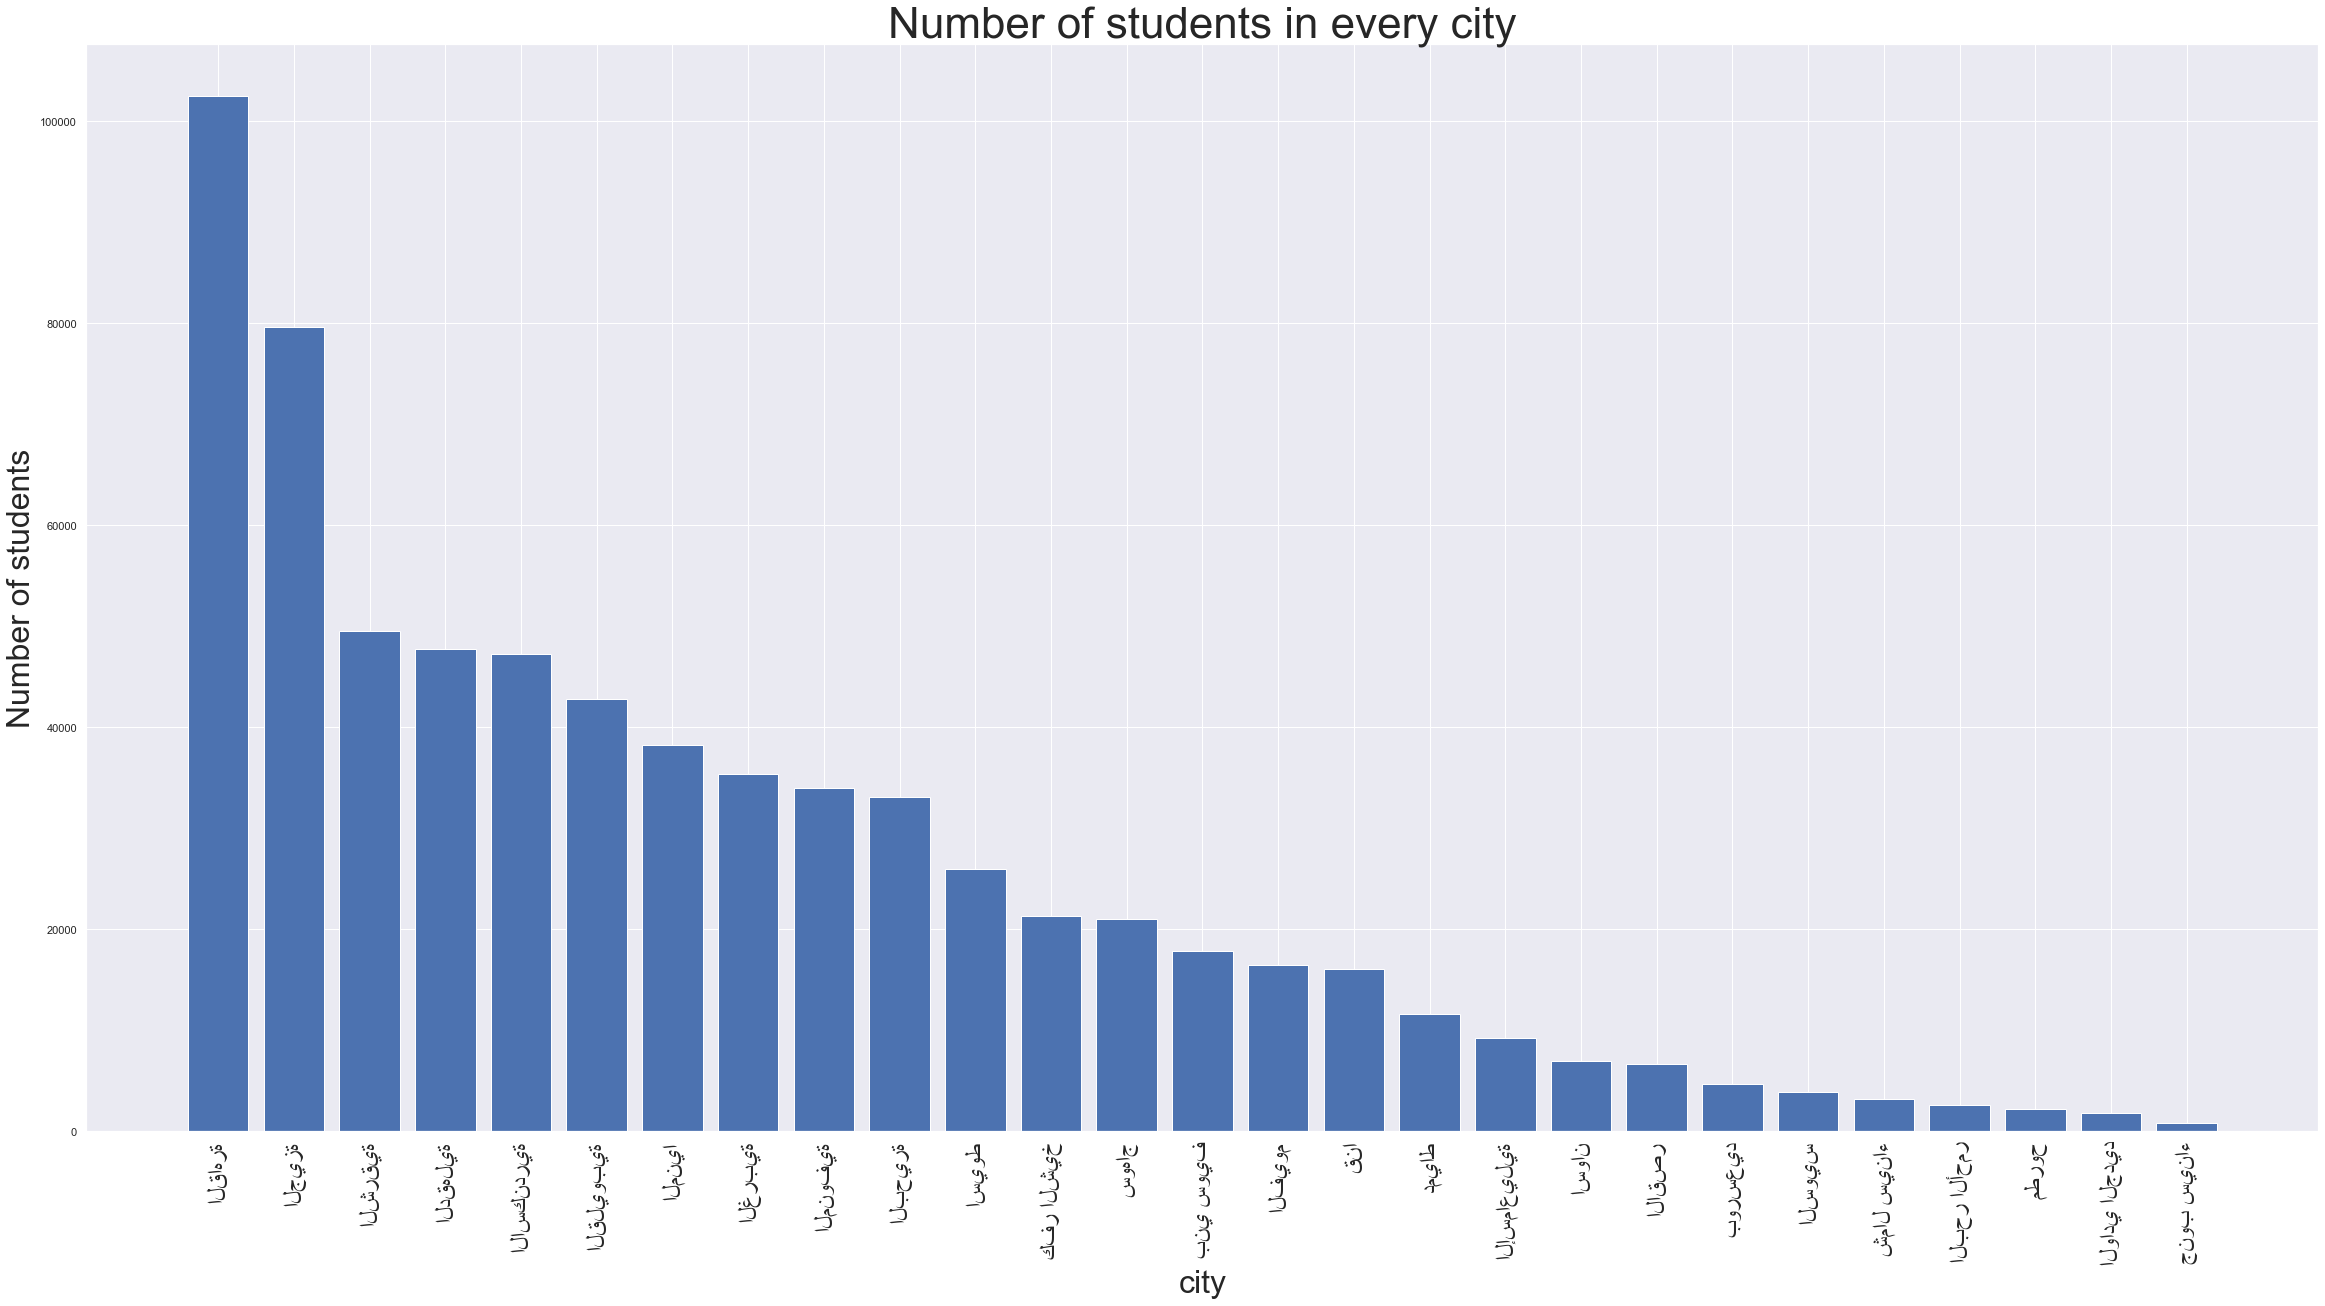

In [268]:
fig,ax=plt.subplots(figsize=(40,20))
ax.bar(dfcs.index,dfcs)
ax.set_xticklabels(dfcs.index,rotation=90,fontsize=24)
ax.set_ylabel("Number of students",fontsize=32)
ax.set_xlabel("city",fontsize=32)
ax.set_title("Number of students in every city",fontsize=44)
plt.show()

### Which's the most city have schools?

In [231]:
#df.groupby(['school_name','city']).size().reset_index().groupby('city')[[0]].max()

In [232]:
dfsc = df.groupby(['school_name', 'city']).size().groupby(level=1).max().sort_values(ascending=False)
dfsc

city
الجيزة           2778
المنيا           1737
القاهرة          1269
الغربية          1188
الاسكندرية       1162
الدقهلية         1161
البحيرة          1118
المنوفية          960
الشرقية           899
الفيوم            888
كفر الشيخ         848
اسيوط             790
دمياط             768
القليوبية         711
بني سويف          646
قنا               613
سوهاج             557
الاقصر            544
شمال سيناء        527
بورسعيد           508
اسوان             468
الإسماعيلية       454
مطروح             385
السويس            371
البحر الأحمر      362
الوادي الجديد     245
جنوب سيناء        160
dtype: int64

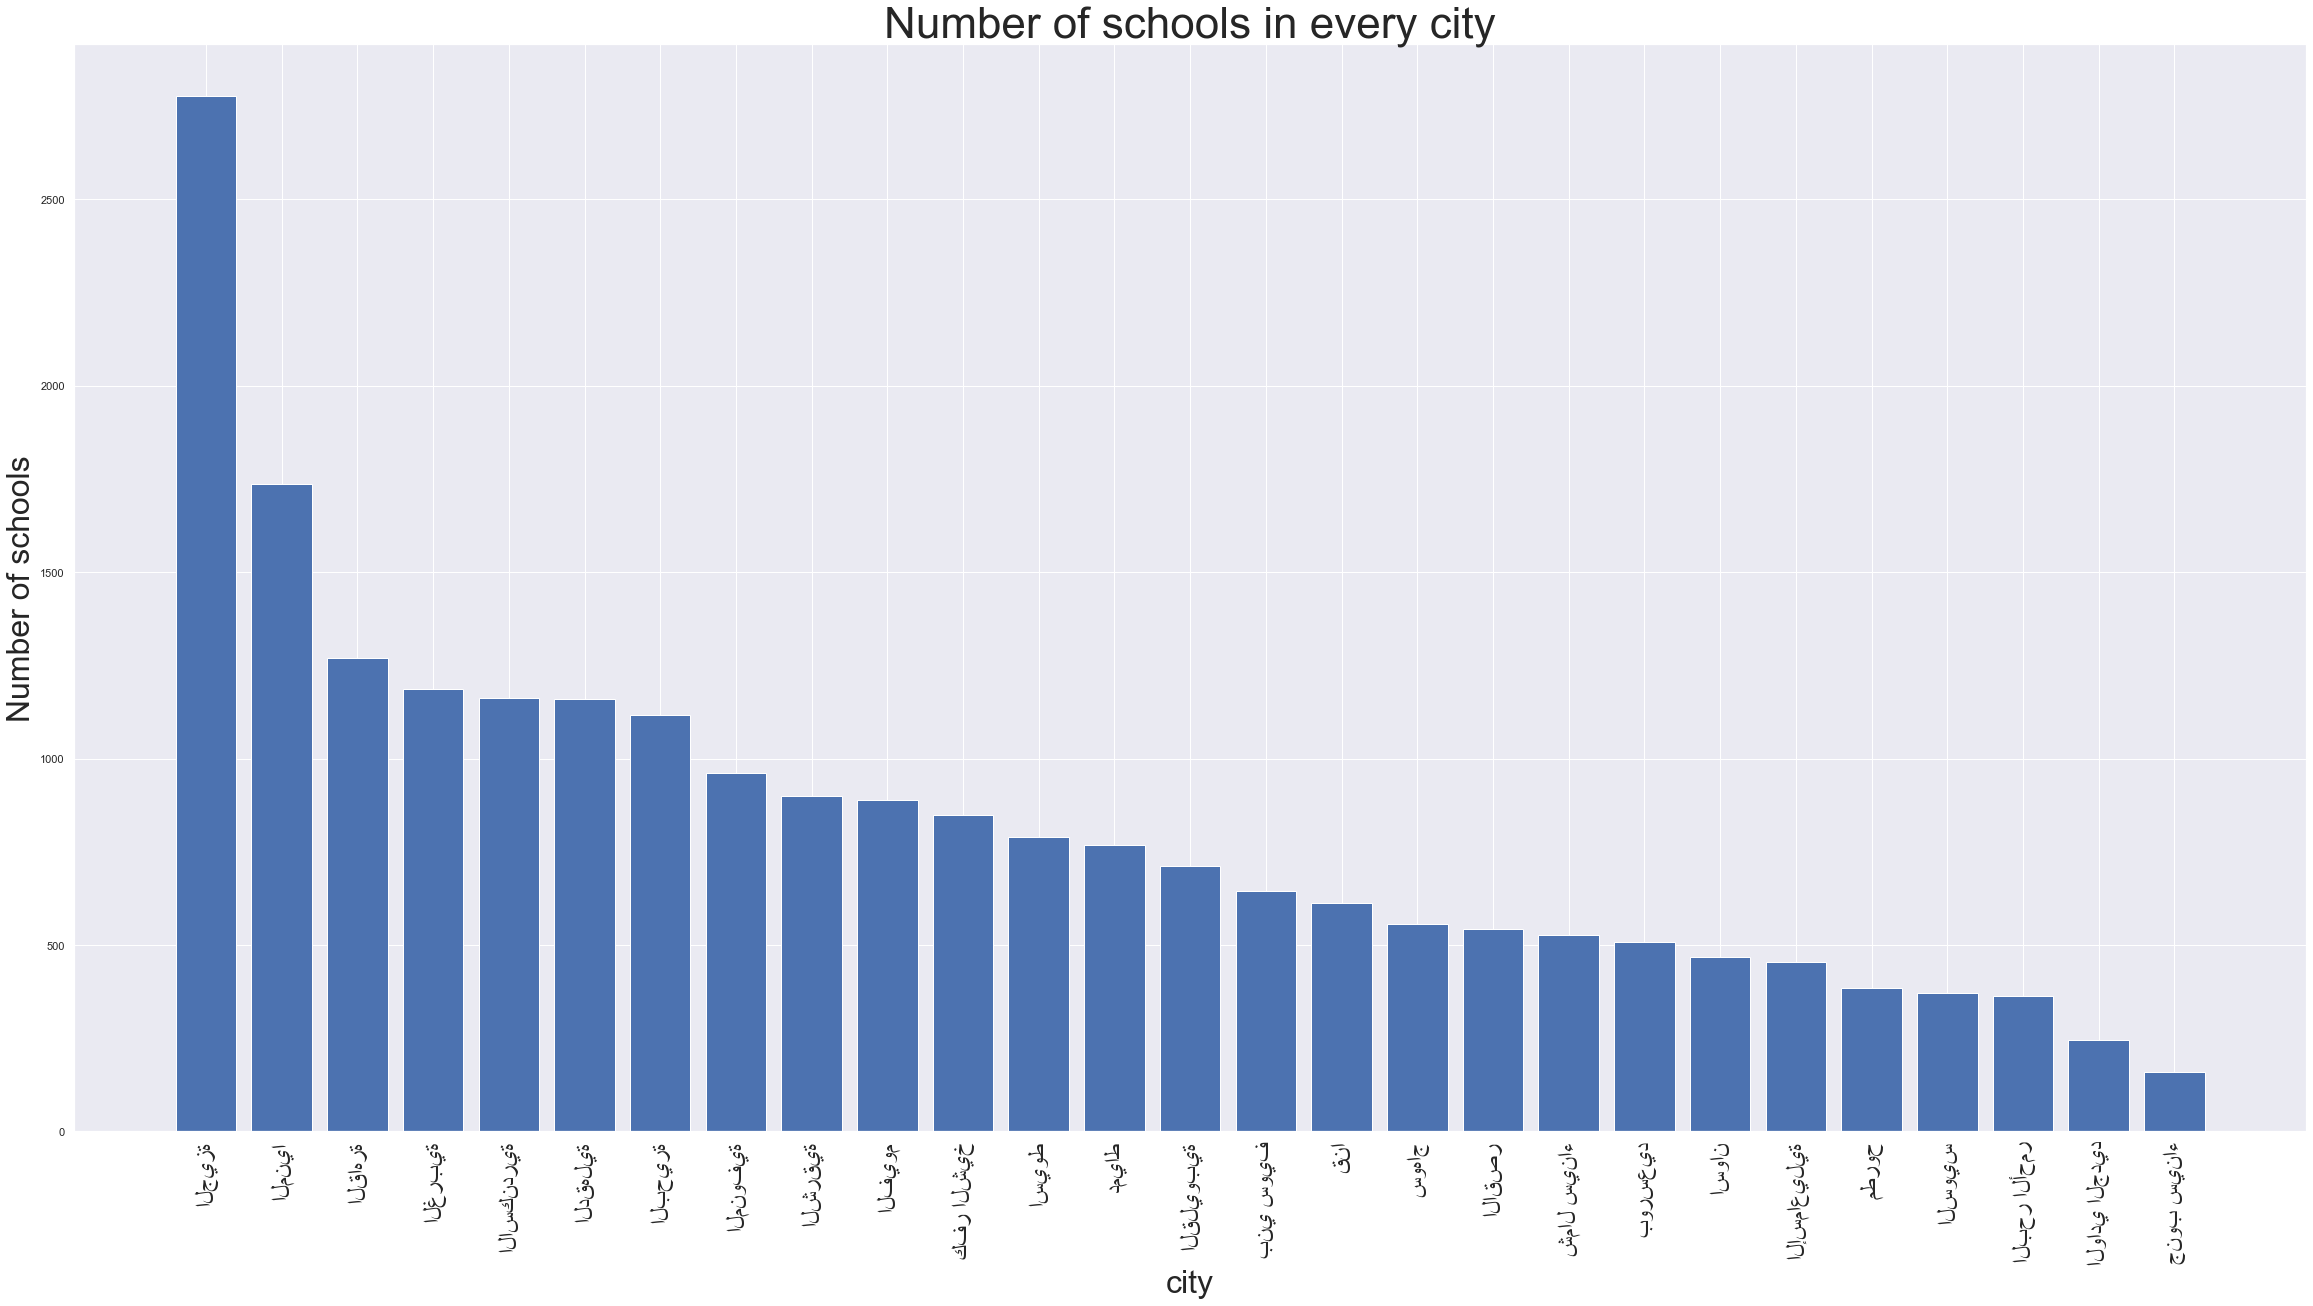

In [233]:
fig,ax=plt.subplots(figsize=(40,20))
ax.bar(dfsc.index,dfsc)

ax.set_xticklabels(dfsc.index,rotation=90,fontsize=24)
ax.set_ylabel("Number of schools",fontsize=32)
ax.set_xlabel("city",fontsize=32)
ax.set_title("Number of schools in every city",fontsize=44)
plt.show()

###  Which is more male or female in students?

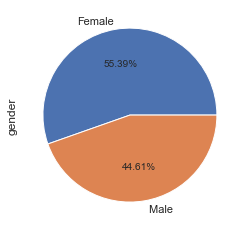

In [234]:
df['gender'].value_counts().plot.pie(labels = ['Female', ' Male'], autopct='%1.2f%%');

### What is most branch students enter?

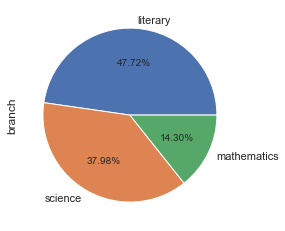

In [235]:
df['branch'].value_counts().plot.pie(labels = ['literary', 'science', 'mathematics'], autopct='%1.2f%%');

### What's the percent of success?

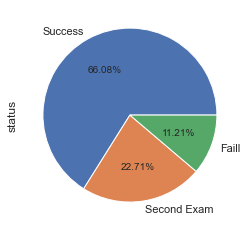

In [236]:
df['status'].value_counts().plot.pie(labels = ['Success', 'Second Exam', 'Faill'], autopct='%1.2f%%');

### Which is more male or female in students in every city?

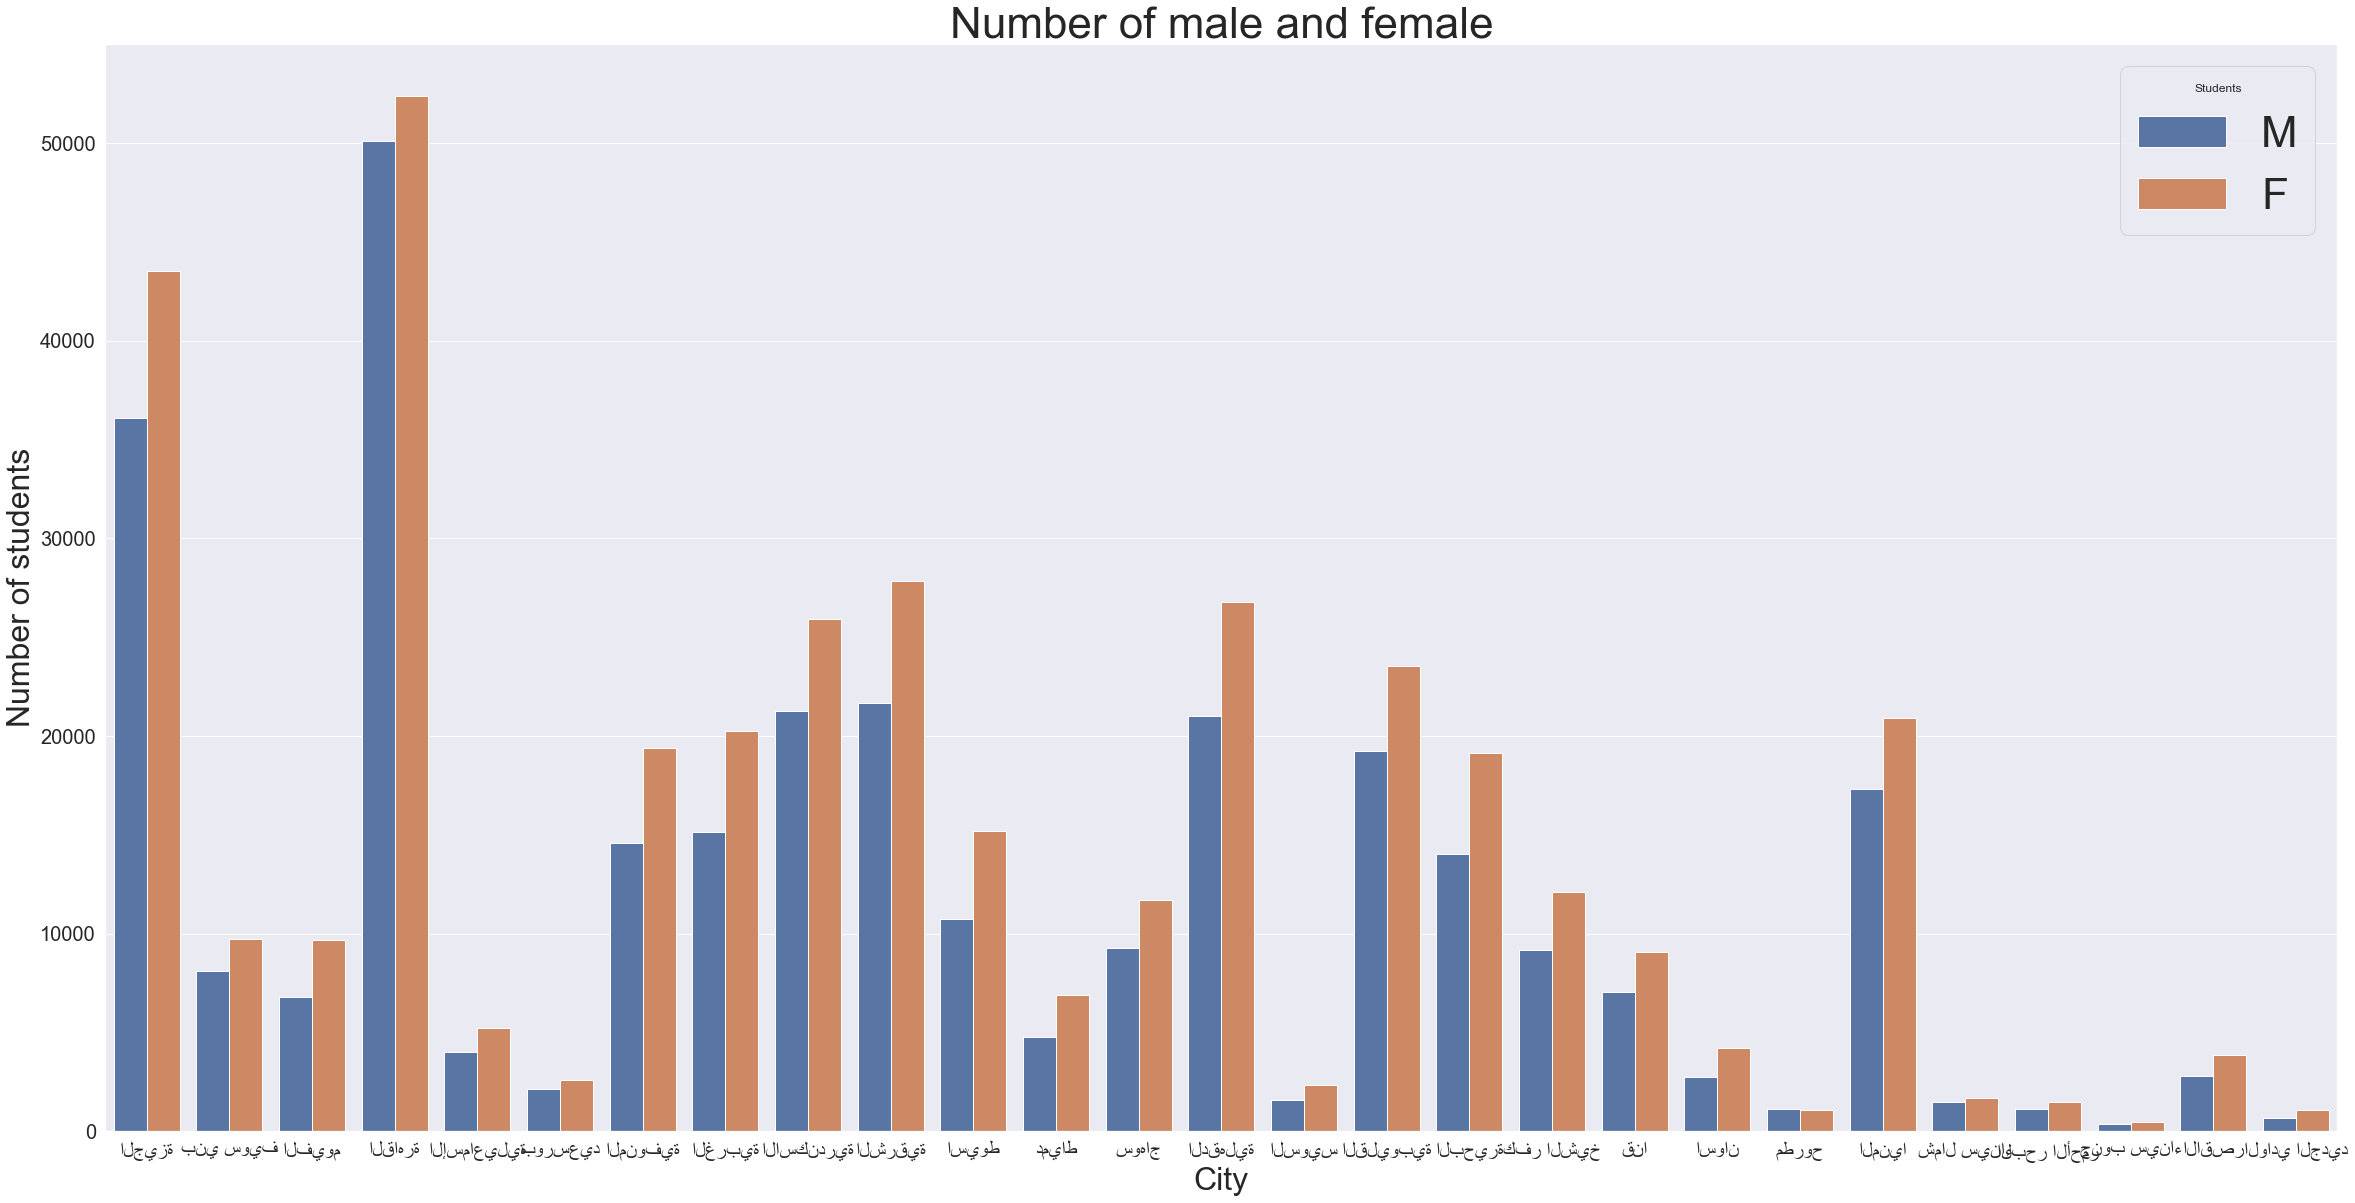

In [253]:
plot_color= {"Male":"blue", "Female":"red"}
#sns.set(font_scale=2)
sns.countplot(x=df["city"],hue=df["gender"])
sns.set(rc={'figure.figsize':(40,20)})
#sns.set(font="Verdana")
#modify individual font size of elements
plt.legend(title='Students', fontsize=44)
plt.xlabel('City', fontsize=32);
plt.ylabel('Number of students', fontsize=32);
plt.title('Number of male and female', fontsize=44)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.show()

<a id='conclusions'></a>
## Conclusions


> **Results our data suggest that**<br>1.We found that the most city have students is Cairo.<br>2.we found that most city have schools is Giza and Cairo must increase number of schools comparing with number of students.<br>3.we found also that number of female students is more than number of male students so we should increase number of schools for female.<br>4.we found that most branch students enter is literary so we should increase number of teachers in this branch.<br>5.The exams isn't easy percent of success was 66.08% which I think its low ratio comapring with the past exams.<br>6.We found that all cities female students is more than male students so we really need to increase number of schools for female.

<a id='referancess'></a>
## Referancess

> **1- <a href="https://stackoverflow.com/questions/17679089/pandas-dataframe-groupby-two-columns-and-get-counts">Pandas DataFrame Groupby two columns and get counts</a>**
 
> **2- <a href="https://www.geeksforgeeks.org/how-to-sort-pandas-dataframe/#:~:text=In%20order%20to%20sort%20the,in%20Ascending%20or%20Descending%20order">How to Sort Pandas DataFrame?</a>**

<li><a href="#start">Table of Contents</a></li>